<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm
from matplotlib import animation
from IPython.display import HTML

#Consider function f(t)=1/(t^2+1)
#We want to compute the Fourier transform g(w)

#Discretize time t
x0=-100.
dx = 0.01
x=np.arange(x0,-x0,dx)

# Theory

The Fourier Transform is defined as

$$F(w) = \frac{1}{\sqrt{2 \pi}} \int_{- \infty}^{\infty} f(t)e^{-iwt}dt $$

Lets suppose that we are working digitally and have an array of times $t=t_0+n\Delta t$. Summing over all times then yields

$$F(w) = \frac{1}{\sqrt{2 \pi}}\sum_{n=0}^N f(t_0+n\Delta t)e^{-i wt_0}e^{-iwn\Delta t} \Delta t $$

Taking the non-n dependent terms out of the sum yields

$$F(w) = \frac{1}{\sqrt{2 \pi}}\Delta te^{-i wt_0}\sum_{n=0}^N f(t_0+n\Delta t)e^{-iwn\Delta t}  $$

The <b>sum</b> (not the factor out front) is <b> discrete Fourier transform function </b> $F_d (w)$. We can use g=np.fft.fft(f) and  w' = np.fft.fftfreq(f.size) to get arrays of $w'$ and $F(w)$ from

$$F_d(w) = \sum_{n=0}^N f(t_0+n\Delta t)e^{-i (2 \pi n w')}  $$

Notice that the term in the exponential is slightly different. In otherwords, the command np.fft.fftfreq(f.size) returns the array $w'$ and not $w$. We can renormalize the arrays using

$$ w = \frac{2 \pi}{\Delta t}w' $$

$$F =\frac{1}{\sqrt{2 \pi}}\Delta te^{-i wt_0} F_d  $$

We now have an array $F$ which we can plot as a function of $w$. This would yield a plot of the <b> continuous Fourier Transform </b>.

# Plotting

In [3]:
def light_intensity(x, signal_gain = 1, noise_gain = 0.01):
    signal = norm.pdf(x, 0, 1)
    noise = np.random.randn(x.size)
    return signal_gain * signal + noise_gain * noise

def light_intensity2(x, signal_gain = 1, noise_gain = 0.01):
    signal = np.array([0.2 if abs(d)<2.5 else 0 for d in x])
    noise = np.random.randn(x.size)
    return signal_gain * signal +noise_gain * noise
    
f=light_intensity2(x)

In [4]:
def get_fourier(x, f):

#Compute Fourier transform by numpy's FFT function
    g=np.fft.fft(f)
#frequency normalization factor is 2*np.pi/dx
    dx = x[1]-x[0]
    w = np.fft.fftfreq(f.size)*2*np.pi/dx


#In order to get a discretisation of the continuous Fourier transform
#we need to multiply g by a phase factor
    g*=dx*np.exp(-complex(0,1)*w*x0)/(np.sqrt(2*np.pi))
    
    return w, g


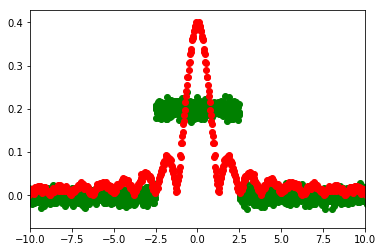

In [5]:
w, g = get_fourier(x, f)

plt.scatter(x,f,color='g')
plt.scatter(w,np.abs(g),color="r")

plt.gca().set_xlim(-10,10)
plt.show()

# Animation

In [6]:
%%capture

fig, ax = plt.subplots(2, figsize=(8,10))
line1, = ax[0].plot(x, f, 'ro')
line2, = ax[1].plot(w, g, 'go')
lines = [line1, line2]

ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)

In [7]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return lines,

In [8]:
def animate(i):
    x=np.arange(x0,-x0,dx)
    f=light_intensity2(x, noise_gain=0.01)
    w1, g1 = get_fourier(x, f)
    w2, g2 = get_fourier(w1, np.abs(g1))
    line1.set_data(x, f)
    line2.set_data(w1, np.abs(g1))
    
    return tuple([line1, line2])

In [9]:
fps=20
frames = 25*fps
interval = 1000*(1./fps) #milliseconds

In [10]:
anim = animation.FuncAnimation(fig, animate, frames = frames, interval=interval, blit=True)

In [11]:
HTML(anim.to_html5_video())